#Στειροπούλου Ευαγγελία 
###Α.Μ. 111520180016
##Εργασία 2η Αναγνώριση Προτύπων - Μηχανική Μάθηση



#Face recognition: 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people ##Labeled Faces in the Wild
from sklearn.decomposition import PCA
import glob
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

['/home/eva/Documents/machine_learning/project2/faces/person01_04.png', '/home/eva/Documents/machine_learning/project2/faces/person01_39.png', '/home/eva/Documents/machine_learning/project2/faces/person01_17.png', '/home/eva/Documents/machine_learning/project2/faces/person01_49.png', '/home/eva/Documents/machine_learning/project2/faces/person01_42.png', '/home/eva/Documents/machine_learning/project2/faces/person01_12.png', '/home/eva/Documents/machine_learning/project2/faces/person01_63.png', '/home/eva/Documents/machine_learning/project2/faces/person01_51.png', '/home/eva/Documents/machine_learning/project2/faces/person01_08.png', '/home/eva/Documents/machine_learning/project2/faces/person01_50.png', '/home/eva/Documents/machine_learning/project2/faces/person01_18.png', '/home/eva/Documents/machine_learning/project2/faces/person01_16.png', '/home/eva/Documents/machine_learning/project2/faces/person01_57.png', '/home/eva/Documents/machine_learning/project2/faces/person01_22.png', '/hom

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (10).

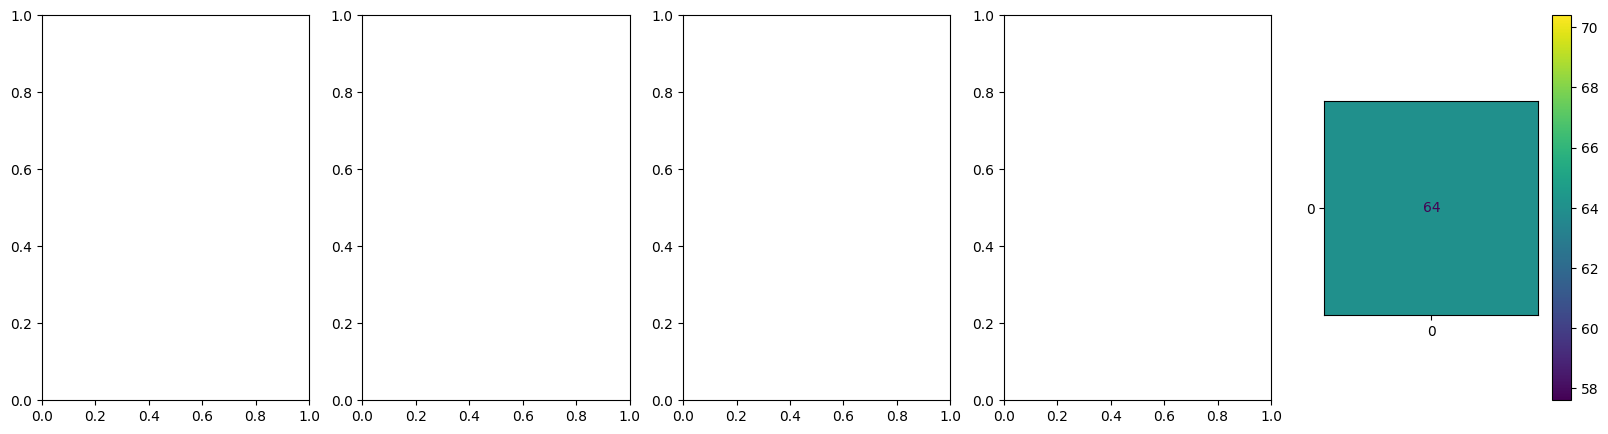

In [42]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def loadImages(path, set_number):
    set_folder = path
    persons = glob.glob(set_folder + "/person" + set_number + "*.png")
    print(persons)
    # assume X is a 2500xN matrix containing N 50x50 images
    faces = []
    labels = []
    for person in persons:
        face = plt.imread(person)
        person_number = int(re.split("_", (re.split(set_folder+"/person", person))[1])[0])
        faces.append(face.flatten())
        labels.append(person_number)

    faces = np.array(faces)
    labels = np.array(labels)
    return faces, labels

def normalization(faces):
    X = np.ndarray(shape=faces.shape)  # Normalized data matrix
      # normalisation ton prosopon afairontas mesi timi kai diairontas me typiki apoklisi
    for i in range(faces.shape[0]):
        X[i] = (faces[i] - np.mean(faces, axis = 0)) / np.std(faces, axis = 0)
    return X


X_set1, y_set1 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '01')
   
average_face = np.mean(X_set1, axis=0)

X_train_set = normalization(X_set1)

print(X_train_set.shape)

accuracy = []
for d in [9,30]:

    pca = PCA(n_components=d, whiten=True).fit(X_train_set)
    X_train_pca = pca.transform(X_train_set)
    classifier = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_set1)

    figur, ax = plt.subplots(1, 5, figsize=(20, 5))

    for i in range(5):
        X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", '0' + str(i + 1))
        X_test_set = normalization(X_set)
        X_test_pca = pca.transform(X_test_set)
        y_pred = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_set).predict(X_test_pca)
        accuracy.append(int(accuracy_score(y_set, y_pred) * 100))
        print(accuracy_score(y_set, y_pred))

        names =[1,2,3,4,5,6,7,8,9,10]
        #create confusion matrix
        cfmatr = confusion_matrix(y_set, y_pred)
        cmd = ConfusionMatrixDisplay(cfmatr, display_labels=names)
        cmd.plot(ax=ax[i-1])
        cmd.ax_.set_title("Set_"+str(i)+ " Score: "+str(int(accuracy_score(y_set, y_pred)*100))+"%")
        cmd.im_.colorbar.remove()
        cmd.ax_.set_xlabel('')
    
      # gia to plotting ton confusion matrixes
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.tight_layout()
    plt.show()


In [ ]:

#Test for dimension 30
pca = PCA(n_components=30, whiten=True)
pca.fit(X_train_set)
X_train_pca = pca.transform(X_train_set)
classifier = KNeighborsClassifier(n_neighbors = 1).fit(X_train_pca, y_set1)

figur, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(1,6):
    X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", '0'+str(i+1))
    X_test_set = normalization(X_set)
    X_test_pca = pca.transform(X_test_set)
    y_pred = classifier.predict(X_test_pca)
    accuracy.append(int(accuracy_score(y_set, y_pred)*100))

    # ta labels poy tha xreiastoun parakato
    names =[1,2,3,4,5,6,7,8,9,10]

    # ektipono ektos apo to Score kai to confusion matrix
    cfmatr = confusion_matrix(y_set, y_pred)
    cmd = ConfusionMatrixDisplay(cfmatr, display_labels=names)
    cmd.plot(ax=ax[i-1])
    cmd.ax_.set_title("Set_"+str(i)+ " Score: "+str(int(accuracy_score(y_set, y_pred)*100))+"%")
    cmd.im_.colorbar.remove()
    cmd.ax_.set_xlabel('')

# gia to plotting ton confusion matrixes
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.show()

##I: Συνάρτηση loadImages:

In [12]:
def loadImages(path, set_number):
    set_folder = "faces"
    persons = glob.glob(set_folder+"/*.png")
    # assume X is a 2500xN matrix containing N 50x50 images
    faces = []
    labels = []
    for person in persons:
        face = plt.imread(person)
        person_number = int(person.split("/")[-1].split("_")[0][6:])
        faces.append(face.flatten())
        labels.append(person_number)

    faces = np.array(faces)
    labels = np.array(labels)
    return faces, labels

Όπως αναφέρεται στην εκφώνηση, η προεπεξεργασία της εικόνας είναι απαραραίτητη, και γίνεται με την αφαίρεση της μέσης τιμής της και στην συνέχεια με την διαίρεση με την τυπική απόκλιση των τιμών της.

In [19]:

def normalization(faces):
    X = np.ndarray(shape=faces.shape) #Normalized data matrix
    for i in range(faces.shape[0]):
        X[i] = (faces[i] - np.mean(faces))/np.std(faces) #Mean normalization of the data

    return X


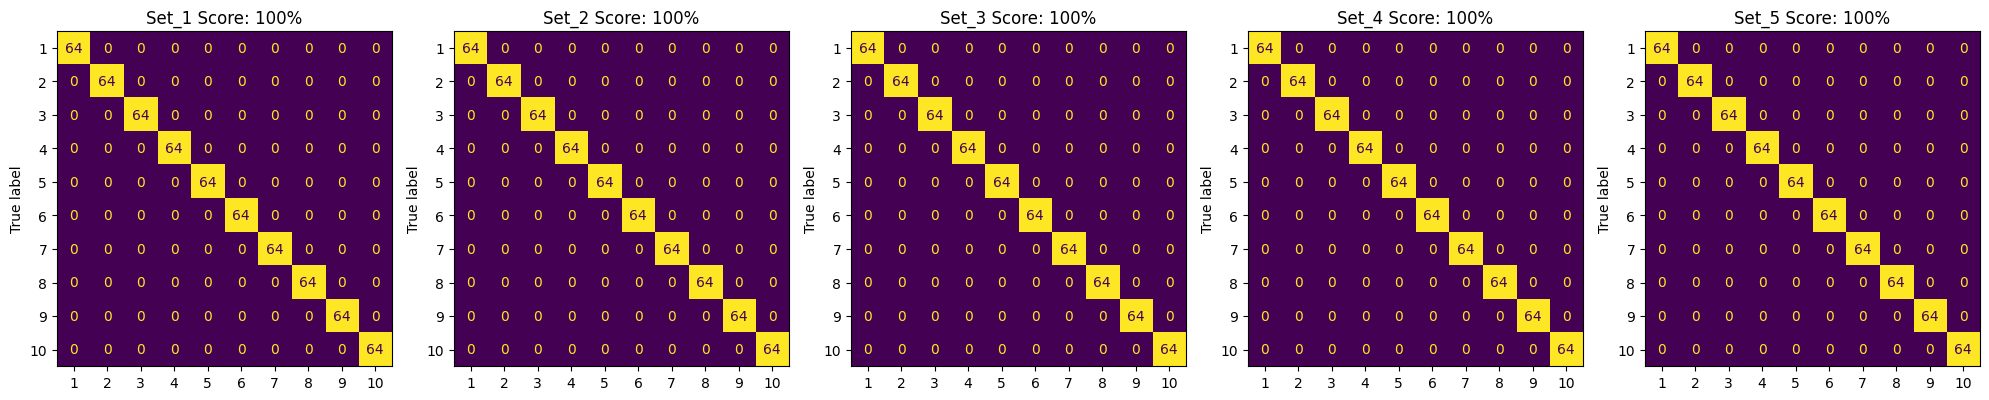

In [20]:

X_set1, y_set1 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '01')
average_face = np.mean(X_set1, axis=0)

X_train_set = normalization(X_set1)

accuracy = []

dimensions = [9,30]


# Test for dimension 9
pca = PCA(n_components=9, whiten=True).fit(X_train_set)
X_train_pca = pca.transform(X_train_set)
classifier = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_set1)

figur, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", '0' + str(i + 1))
    X_test_set = normalization(X_set)
    X_test_pca = pca.transform(X_test_set)
    y_pred = classifier.predict(X_test_pca)
    accuracy.append(int(accuracy_score(y_set, y_pred) * 100))

    # The labels that will be used below
    names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Display the confusion matrix and accuracy
    cfmatr = confusion_matrix(y_set, y_pred)
    cmd = ConfusionMatrixDisplay(cfmatr, display_labels=names)
    cmd.plot(ax=ax[i])
    cmd.ax_.set_title("Set_" + str(i + 1) + " Score: " + str(int(accuracy_score(y_set, y_pred) * 100)) + "%")
    cmd.im_.colorbar.remove()
    cmd.ax_.set_xlabel('')

# Adjust the layout and display the confusion matrices
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.show()

# #Test for dimension 9 
# pca = PCA(n_components=9, whiten=True).fit(X_train_set)
# X_train_pca = pca.transform(X_train_set)
# classifier = KNeighborsClassifier(n_neighbors = 1).fit(X_train_pca, y_set1)

# figur, ax = plt.subplots(1, 5, figsize=(20, 5))
# for i in range(5):
#     X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", '0'+str(i+1))
#     X_test_set = normalization(X_set)
#     X_test_pca = pca.transform(X_test_set)
#     y_pred = classifier.predict(X_test_pca)
#     accuracy.append(int(accuracy_score(y_set, y_pred)*100))

#     # ta labels poy tha xreiastoun parakato
#     names =[1,2,3,4,5,6,7,8,9,10]

#     # ektipono ektos apo to Score kai to confusion matrix
#     cfmatr = confusion_matrix(y_set, y_pred)
#     cmd = ConfusionMatrixDisplay(cfmatr, display_labels=names)
#     cmd.plot(ax=ax[i-1])
#     cmd.ax_.set_title("Set_"+str(i)+ " Score: "+str(int(accuracy_score(y_set, y_pred)*100))+"%")
#     cmd.im_.colorbar.remove()
#     cmd.ax_.set_xlabel('')

# # gia to plotting ton confusion matrixes
# plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.tight_layout()
# plt.show()


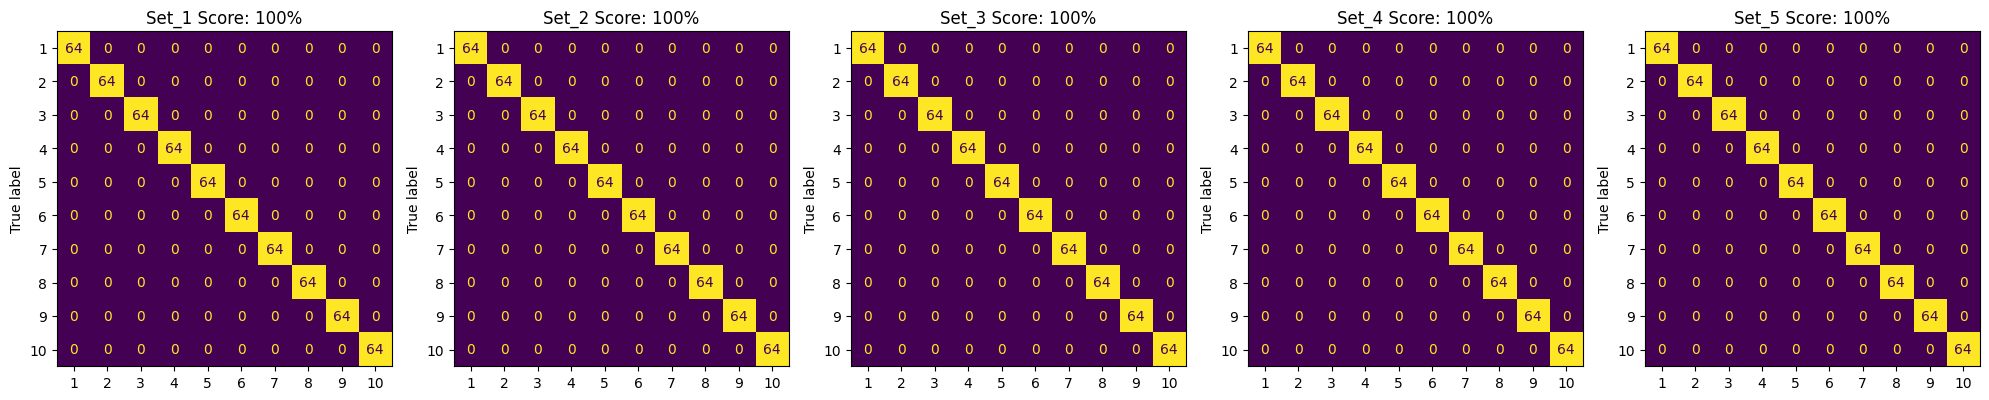

In [15]:

#Test for dimension 30
pca = PCA(n_components=30, whiten=True)
pca.fit(X_train_set)
X_train_pca = pca.transform(X_train_set)
classifier = KNeighborsClassifier(n_neighbors = 1).fit(X_train_pca, y_set1)

figur, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(1,6):
    X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", '0'+str(i+1))
    X_test_set = normalization(X_set)
    X_test_pca = pca.transform(X_test_set)
    y_pred = classifier.predict(X_test_pca)
    accuracy.append(int(accuracy_score(y_set, y_pred)*100))

    # ta labels poy tha xreiastoun parakato
    names =[1,2,3,4,5,6,7,8,9,10]

    # ektipono ektos apo to Score kai to confusion matrix
    cfmatr = confusion_matrix(y_set, y_pred)
    cmd = ConfusionMatrixDisplay(cfmatr, display_labels=names)
    cmd.plot(ax=ax[i-1])
    cmd.ax_.set_title("Set_"+str(i)+ " Score: "+str(int(accuracy_score(y_set, y_pred)*100))+"%")
    cmd.im_.colorbar.remove()
    cmd.ax_.set_xlabel('')

# gia to plotting ton confusion matrixes
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.show()

In [16]:

X_set2, labels_set2 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '02')

X_set3, labels_set3 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '03')

X_set4, labels_set4 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '04')

X_set5, labels_set5 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '05')

# Step 3: Compute the covariance matrix
covariance_matrix = np.cov(X.T)

# Step 4: Compute the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 5: Choose the number of principal components
n_components = 9

# Step 6: Project the data onto the principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)




NameError: name 'X' is not defined